# Fake news Detection

In [1]:
import pandas as pd 
import re
import string
# read csv from the DATA file
df = pd.read_csv("./Data/news-dataSet.csv")

# Show CSV head
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
#show csv shape
df.shape

(6335, 4)

In [3]:
# show csv columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [4]:
# show Empty values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
# rename column "Unnamed: 0" to "reference"
df.columns = df.columns.str.replace('Unnamed: 0', 'reference')
df.columns

Index(['reference', 'title', 'text', 'label'], dtype='object')

<AxesSubplot: >

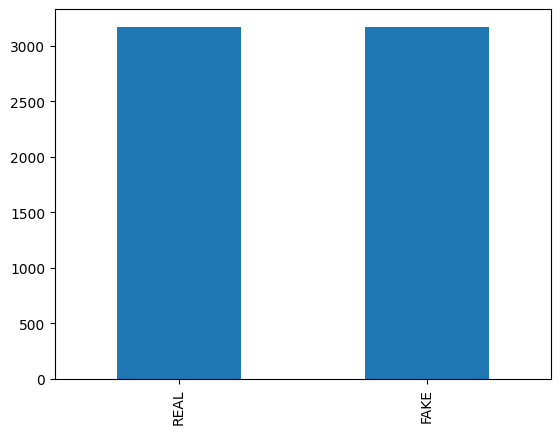

In [6]:
import matplotlib.pyplot as plt

# Count number of FAKE and REAL news
df.label.value_counts().plot.bar()

In [7]:
#concaténation de la colonne title et text
df['content']=df['title']+['text']
print(df['content'])

0                        You Can Smell Hillary’s Feartext
1       Watch The Exact Moment Paul Ryan Committed Pol...
2         Kerry to go to Paris in gesture of sympathytext
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6335, dtype: object


In [8]:
# Création de la fonction qui convertit le text en miniscule
def miniscule(text):
    text = text.lower()  
    return text

In [9]:
#application de la fonction sur la colonne "content"
df["content"] = df["content"].apply(miniscule)
print(df["content"])

0                        you can smell hillary’s feartext
1       watch the exact moment paul ryan committed pol...
2         kerry to go to paris in gesture of sympathytext
3       bernie supporters on twitter erupt in anger ag...
4       the battle of new york: why this primary matte...
                              ...                        
6330    state department says it can't find emails fro...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332    anti-trump protesters are tools of the oligarc...
6333    in ethiopia, obama seeks progress on peace, se...
6334    jeb bush is suddenly attacking trump. here's w...
Name: content, Length: 6335, dtype: object


In [12]:
#Création de la fonction qui supprime les extra space, special caractères , url and links.
def replace(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text 


In [11]:
#application de la fonction sur la colonne "content"
df["content"] = df["content"].apply(replace)
print(df["content"])

0                        you can smell hillary s feartext
1       watch the exact moment paul ryan committed pol...
2         kerry to go to paris in gesture of sympathytext
3       bernie supporters on twitter erupt in anger ag...
4       the battle of new york  why this primary matte...
                              ...                        
6330    state department says it can t find emails fro...
6331    the  p  in pbs should stand for  plutocratic  ...
6332    anti trump protesters are tools of the oligarc...
6333    in ethiopia  obama seeks progress on peace  se...
6334    jeb bush is suddenly attacking trump  here s w...
Name: content, Length: 6335, dtype: object
